In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_raw = pd.read_csv('Train.csv')
train_raw.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35


In [3]:
test_raw = pd.read_csv('Test.csv')
test_raw.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35


In [4]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284780 non-null  int64  
 1   StockCode    284780 non-null  int64  
 2   Description  284780 non-null  int64  
 3   Quantity     284780 non-null  int64  
 4   InvoiceDate  284780 non-null  object 
 5   UnitPrice    284780 non-null  float64
 6   CustomerID   284780 non-null  float64
 7   Country      284780 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 17.4+ MB


In [5]:
train_raw.drop(['InvoiceNo','InvoiceDate'],1,inplace=True)
train_raw.head(2)

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,1583,144,3,3.75,14056.0,35
1,1300,3682,6,1.95,13098.0,35


In [6]:
train_raw.skew()

StockCode        0.271247
Description     -0.133967
Quantity         0.226115
UnitPrice      438.340508
CustomerID       0.029524
Country         -3.050125
dtype: float64

<AxesSubplot:>

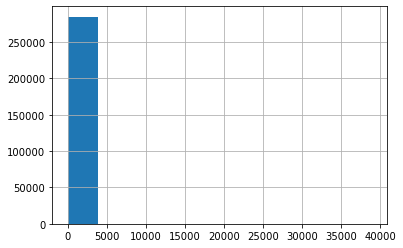

In [8]:
train_raw['UnitPrice'].hist()

In [9]:
corr_mat = train_raw.corr(method='pearson')
corr_mat

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
StockCode,1.000000,-0.013230,-0.000942,0.020073,0.002887,0.006242
Description,-0.013230,1.000000,0.000194,-0.000424,-0.005227,-0.014791
Quantity,-0.000942,0.000194,1.000000,-0.000924,-0.002930,-0.008001
UnitPrice,0.020073,-0.000424,-0.000924,1.000000,-0.004932,-0.005378
CustomerID,0.002887,-0.005227,-0.002930,-0.004932,1.000000,0.388198
Country,0.006242,-0.014791,-0.008001,-0.005378,0.388198,1.000000


<AxesSubplot:>

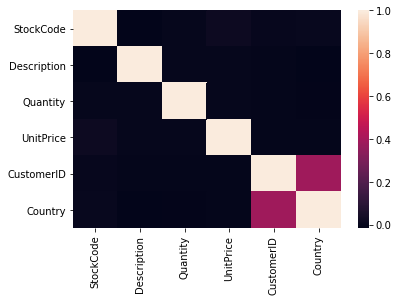

In [10]:
sns.heatmap(corr_mat)

In [11]:
y = train_raw['UnitPrice']
X = train_raw.drop(['UnitPrice'],1)

In [12]:
X.shape, y.shape

((284780, 5), (284780,))

In [13]:
from sklearn.preprocessing import PowerTransformer
y = y.values.reshape(-1,1)
y.shape

(284780, 1)

In [14]:
y[:10]

array([[3.75],
       [1.95],
       [5.95],
       [0.83],
       [1.65],
       [1.65],
       [1.25],
       [1.25],
       [5.75],
       [2.95]])

In [15]:
power = PowerTransformer()
y = power.fit_transform(y)
y[:10]

array([[ 0.78791467],
       [ 0.01363741],
       [ 1.28323652],
       [-0.97944058],
       [-0.18857425],
       [-0.18857425],
       [-0.51952138],
       [-0.51952138],
       [ 1.24858962],
       [ 0.51050554]])

In [16]:
y1 = train_raw['UnitPrice']
y1 = y1.values.reshape(-1,1)
y1[:10]

array([[3.75],
       [1.95],
       [5.95],
       [0.83],
       [1.65],
       [1.65],
       [1.25],
       [1.25],
       [5.75],
       [2.95]])

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
y1 = scaler.fit_transform(y1)
y1[:10]

array([[ 0.00381105],
       [-0.01914831],
       [ 0.03187249],
       [-0.03343413],
       [-0.02297487],
       [-0.02297487],
       [-0.02807695],
       [-0.02807695],
       [ 0.02932145],
       [-0.00639311]])

In [22]:
from sklearn.model_selection import train_test_split
train_test_split?

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [25]:
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score

In [26]:
from sklearn.pipeline import Pipeline
pipes = []
pipes.append(('scaledLR', Pipeline([('scaler',MinMaxScaler()),('LR',LinearRegression())])))
pipes.append(('scaledLASSO', Pipeline([('scaler',MinMaxScaler()),('Lasso',Lasso())])))
pipes.append(('scaledEN', Pipeline([('scaler',MinMaxScaler()),('EN',ElasticNet())])))
pipes.append(('scaledKNN', Pipeline([('scaler',MinMaxScaler()),('KNN',KNeighborsRegressor())])))
pipes.append(('scaledCART', Pipeline([('scaler',MinMaxScaler()),('CART',DecisionTreeRegressor())])))
pipes.append(('scaledGBM', Pipeline([('scaler',MinMaxScaler()),('GBM',GradientBoostingRegressor())])))
pipes.append(('scaledRF', Pipeline([('scaler',MinMaxScaler()),('RF',RandomForestRegressor())])))

In [27]:
pipes

[('scaledLR',
  Pipeline(steps=[('scaler', MinMaxScaler()), ('LR', LinearRegression())])),
 ('scaledLASSO',
  Pipeline(steps=[('scaler', MinMaxScaler()), ('Lasso', Lasso())])),
 ('scaledEN',
  Pipeline(steps=[('scaler', MinMaxScaler()), ('EN', ElasticNet())])),
 ('scaledKNN',
  Pipeline(steps=[('scaler', MinMaxScaler()), ('KNN', KNeighborsRegressor())])),
 ('scaledCART',
  Pipeline(steps=[('scaler', MinMaxScaler()), ('CART', DecisionTreeRegressor())])),
 ('scaledGBM',
  Pipeline(steps=[('scaler', MinMaxScaler()),
                  ('GBM', GradientBoostingRegressor())])),
 ('scaledRF',
  Pipeline(steps=[('scaler', MinMaxScaler()), ('RF', RandomForestRegressor())]))]

In [28]:
results = []
names = []
for name, model in pipes:
    kfold = KFold(n_splits=10,random_state=21)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\yasar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


scaledLR: -0.987342 (0.004402)


C:\Users\yasar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


scaledLASSO: -0.999017 (0.005358)


C:\Users\yasar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


scaledEN: -0.999017 (0.005358)


C:\Users\yasar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


scaledKNN: -0.328651 (0.003928)


C:\Users\yasar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


scaledCART: -0.070952 (0.003615)


C:\Users\yasar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\yasar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\yasar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\yasar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

scaledGBM: -0.517957 (0.005031)


C:\Users\yasar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\yasar\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\yasar\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\yasar\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

scaledRF: -0.045076 (0.003259)


In [29]:
from sklearn.neighbors import KNeighborsRegressor
score = []
for k in range(1,20):    
    clf = KNeighborsRegressor(n_neighbors = k,  weights = 'distance', p=1)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test))

In [30]:
score[:10]

[0.7900920928893951,
 0.8175782621712945,
 0.8228219241908015,
 0.8227591680591424,
 0.8211553899110159,
 0.8186437661683075,
 0.814953972324354,
 0.8116664503035338,
 0.8079919165626381,
 0.8043698681149994]

In [31]:
k_max = score.index(max(score))+1
print( "At K = {}, Max Accuracy = {}".format(k_max, max(score)*100))

At K = 3, Max Accuracy = 82.28219241908015


In [32]:
clf = KNeighborsRegressor(n_neighbors = k_max,  weights = 'distance', p=1)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test ))   
y_pred = clf.predict(X_test)

0.8228219241908015


In [33]:
import joblib
# save the model to disk
filename = 'KNN_Regressor_MachineHack.sav'
joblib.dump(model, filename)

['KNN_Regressor_MachineHack.sav']

In [34]:
test_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


In [35]:
data_test = test_raw.drop(['InvoiceDate','InvoiceNo'],1)
data_test.head()

,StockCode,Description,Quantity,CustomerID,Country
0,1709,1079,3,16161.0,35
1,510,3457,1,17341.0,35
2,604,694,36,15158.0,35
3,1478,3473,2,16033.0,35
4,3216,871,1,15351.0,35


In [36]:
results = clf.predict(data_test)
results

array([[-0.18857425],
       [-0.51952138],
       [ 0.48041908],
       ...,
       [-0.51952138],
       [ 1.34723684],
       [ 0.90143699]])

In [37]:
result = pd.DataFrame(data=results)
result.head()

,0
0,-0.188574
1,-0.519521
2,0.480419
3,-0.196114
4,1.960363


In [38]:
a_inv_trans = power.inverse_transform(result)
a_inv_trans

array([[1.65      ],
       [1.25      ],
       [2.8757157 ],
       ...,
       [1.25      ],
       [6.34386711],
       [4.15      ]])

In [39]:
result = pd.DataFrame(data=a_inv_trans).round(2)
result[:5]

,0
0,1.65
1,1.25
2,2.88
3,1.64
4,12.75


In [41]:
result.to_excel('MachineHack_UnitPricePrediction.xlsx')